In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Train model: logistic Regression


In [2]:
### Data
data_clean = pd.read_csv(r'D:\spring 25\appiled stat\anika Sprint 1\data\Processed\data_clean.csv')
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Seattle, WA - Tucson, AZ","route_Seattle, WA - Washington, DC (Metropolitan Area)","route_St. Louis, MO - Tampa, FL (Metropolitan Area)","route_St. Louis, MO - Washington, DC (Metropolitan Area)","route_Syracuse, NY - Tampa, FL (Metropolitan Area)","route_Syracuse, NY - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL"
0,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
1,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
2,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
4,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


In [3]:
### Logistic regression to catagorize routes as low, medium, high  

In [4]:
data_clean['demand_level'] = pd.qcut(data_clean['cur_passengers'], q=3, labels=['Low', 'Medium', 'High'])


In [5]:
# Target
y = data_clean['demand_level']

In [6]:
# Features (include relevant columns and route one-hot columns)
route_cols = [col for col in data_clean.columns if col.startswith('route_')]
feature_cols = ['Year', 'quarter', 'ly_passengers', 'cur_fare', 'ly_fare', 
                'amount_change', 'percent_change', 'percent_change_pax'] + route_cols

X = data_clean[feature_cols]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# Train a Random Forest Classifier
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)


coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]  # For class "Low" vs Rest; can check all 3
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeffs.head(10))

d:\spring 25\appiled stat\anika Sprint 1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\spring 25\appiled stat\anika Sprint 1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                                                Feature  Coefficient
672    route_Kansas City, MO - Minneapolis/St. Paul, MN    -2.377853
930             route_Philadelphia, PA - Pittsburgh, PA    -2.139481
826   route_Minneapolis/St. Paul, MN - San Francisco...     2.113884
705              route_Las Vegas, NV - Philadelphia, PA     1.895062
988                route_Sacramento, CA - San Diego, CA    -1.824153
203   route_Boston, MA (Metropolitan Area) - Philade...    -1.823691
825      route_Minneapolis/St. Paul, MN - San Diego, CA     1.675523
27                  route_Albuquerque, NM - Phoenix, AZ     1.619263
875   route_New York City, NY (Metropolitan Area) - ...    -1.593471
1014                    route_Seattle, WA - Spokane, WA    -1.574313


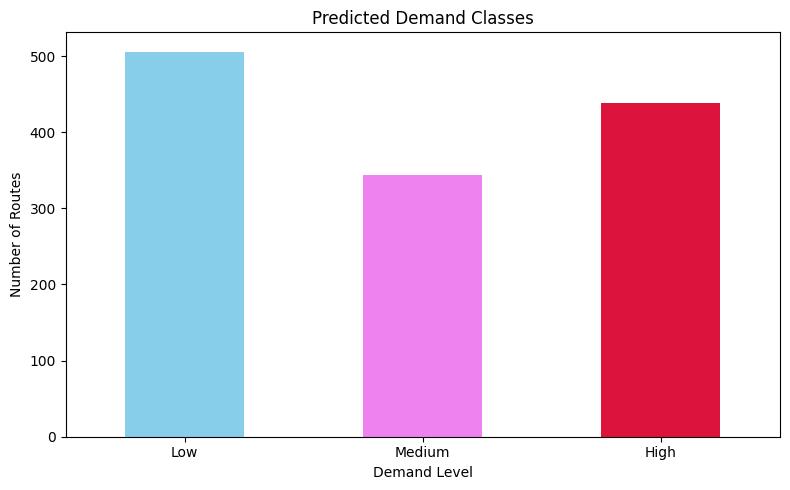

In [10]:

# Count predictions
pred_counts = pd.Series(y_pred).value_counts().reindex(['Low', 'Medium', 'High'])

# Plot
pred_counts.plot(kind='bar', color=['skyblue', 'violet', 'crimson'], figsize=(8, 5))
plt.title("Predicted Demand Classes")
plt.xlabel("Demand Level")
plt.ylabel("Number of Routes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

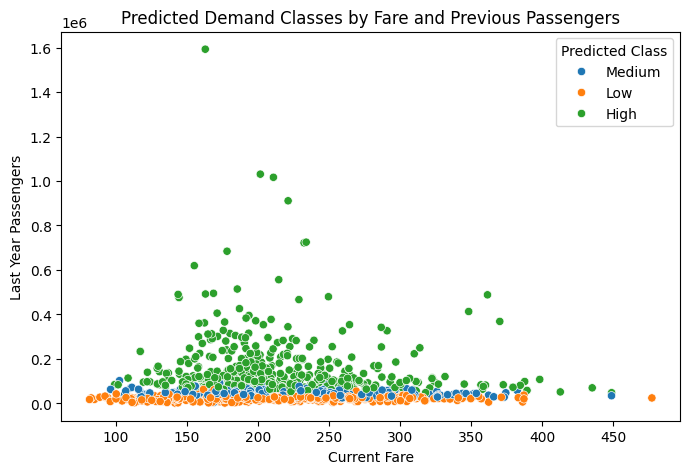

In [11]:
# Add predictions to your test set for plotting
X_test_plot = X_test.copy()
X_test_plot['predicted_class'] = y_pred
X_test_plot['true_class'] = y_test.values

# Scatter: fare vs ly_passengers colored by predicted class
plt.figure(figsize=(7,5))
sns.scatterplot(data=X_test_plot, x='cur_fare', y='ly_passengers', hue='predicted_class')
plt.title("Predicted Demand Classes by Fare and Previous Passengers")
plt.xlabel("Current Fare")
plt.ylabel("Last Year Passengers")
plt.legend(title='Predicted Class')
plt.tight_layout()
plt.show()

# Score is high enough to be useful

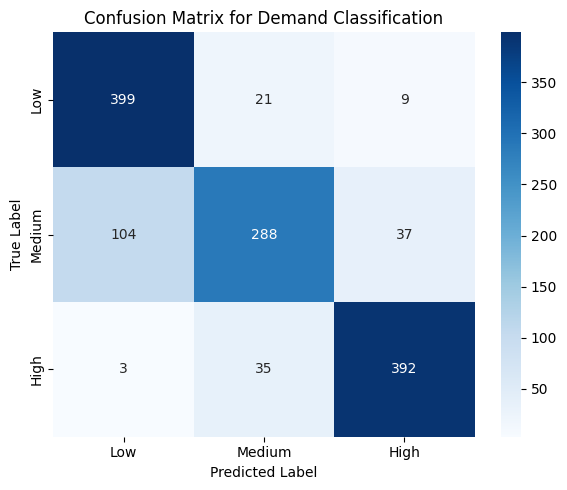

In [12]:
# confusion matrix to see how well the model is doing

from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Demand Classification")
plt.tight_layout()
plt.show()

### Checking accuracy of the model

In [13]:
accuracy_score(y_test, y_pred)
# Score is high enough to be useful

0.8377329192546584

### Predict: If flight is high, medium or low demand


In [14]:
route_cols = [col for col in data_clean.columns if col.startswith('route_')]

features = [
    'Year', 'quarter', 'ly_passengers', 'cur_fare', 'ly_fare',
    'amount_change', 'percent_change', 'percent_change_pax'
] + route_cols


In [15]:
demand_input = pd.DataFrame(columns=features)
demand_input.loc[0] = 0  # Start with all zeros

# Fill in new scenario details
demand_input.at[0, 'Year'] = 2025
demand_input.at[0, 'quarter'] = 2             # changing quarter of the year doesn't matter much
demand_input.at[0, 'ly_passengers'] = 1200   # number to last year passengers greatly effect the demand
demand_input.at[0, 'cur_fare'] = 300
demand_input.at[0, 'ly_fare'] = 490
demand_input.at[0, 'amount_change'] = -100
demand_input.at[0, 'percent_change'] = 8.7
demand_input.at[0, 'percent_change_pax'] = 5.3
#demand_input.at[0, 'route_El Paso, TX - San Diego, CA'] = 1       
demand_input.at[0, 'route_Los Angeles, CA (Metropolitan Area) - San Francisco, CA (Metropolitan Area)'] = 1                       # other routes to test



C:\Users\OWNER\AppData\Local\Temp\ipykernel_17612\1578794871.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  demand_input.at[0, 'percent_change'] = 8.7
C:\Users\OWNER\AppData\Local\Temp\ipykernel_17612\1578794871.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  demand_input.at[0, 'percent_change_pax'] = 5.3


In [16]:
predicted_class = model.predict(demand_input)
print("Predicted demand level:", predicted_class[0])


Predicted demand level: Low
